In [1]:
from pandas import Series, DataFrame
import pandas as pd
import re

df = pd.read_csv('NYC_Restaurants.csv',dtype=unicode)

Q1 Create a unique name for each restaurant

Approach: added a new column that concatenated the DBA, BUILDING, STREET,
Columns with spaces in between

In [2]:
df['RESTAURANT']=df['DBA']+" "+df['BUILDING']+" "+df['STREET']+" "+df["ZIPCODE"]
print df['RESTAURANT'][:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


Q2 How many restaurants are included in the data?

Approach: created a unique restaurants dataframe and deleted all duplicates\
in the RESTAURANT column
used the len function to find the number of records in the uniqueResturants\
data frame

In [3]:
uniqueRestaurants = df.drop_duplicates(subset='RESTAURANT')
print "Number of restaurants:", len(uniqueRestaurants)

Number of restaurants: 10114


Q3 How many chains are there?

Approach: created a data frame with a value count of the 'DBA' column
used the unique restaurants dataframe so that repeat offenders wouldn't be
counted twice
created a mask for when the value count was greater than or equal to 2
applied the mask to the list of unique restaurants
found the length (len) of the new dataframe

In [4]:
#create dataframe with the count of each restaurant of a chain
numberOfEach = uniqueRestaurants['DBA'].value_counts()
#create a mask to find resturants with 2 or more locations (chains)
chainMask = (numberOfEach >= 2)
chains = numberOfEach[chainMask]

print "Number of chains:", len(chains)


Number of chains: 368


Q4 Plot a bar graph of the top 20 most popular chains?

Approach: take the chains data frame and create a bar plot of the 
top 20 chains, which would be the ones with highest value counts
import %pylab inline to show bar plot

Populating the interactive namespace from numpy and matplotlib
1666


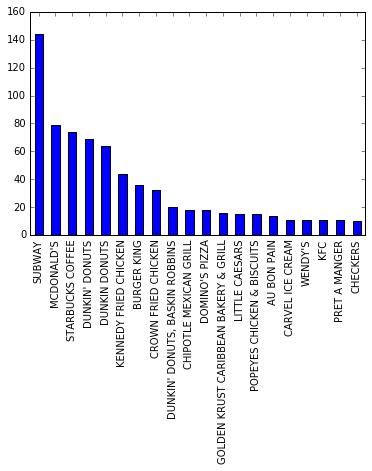

In [5]:
%pylab inline
top20_chains = chains[:20]
top20_chains.plot(kind='bar')
print sum(chains)

Q5 What fraction of all restaurants are chains?

Approach: we need the total number of restaurants and the total 
number of restaurant in chains  restaurants in chains / 
total number of restaurants

In [6]:
percentage_of_chains = float(sum(chains))/float(len(uniqueRestaurants))
print 'Fraction of restaurants that are chains '+ "%.2f" % float(percentage_of_chains *100) + "%"

Fraction of restaurants that are chains 16.47%


Q6 Plot all non-chain restaurants in each borrough

Approach: First we created a series that included only borroughs and unique restaurants,we derived this series from the unique restaurant dataframe from problem 2. Then I filtered out all the missing borrough values by dropping them. I then created a mask and applied it to the dataframe that we removed the missing values from. So at this point only non_chain restaurants should show. Once applied, the dataframe became a series, so i converted it back to a series so that it could be merged. Then i used value counts on the boroughs and plotted it 

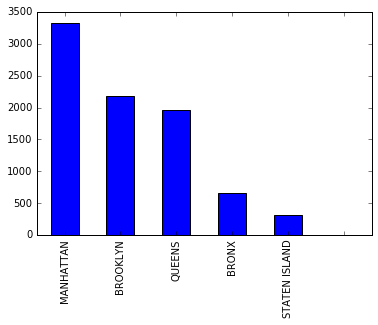

In [40]:
#building series of only borroughs and restaurants
rest_borrough = uniqueRestaurants[['DBA','BORO']]


#null_BORO_series = rest_borrough['BORO'].replace("Missing","")

#mergedRestBorough = pd.merge(null_BORO_series, rest_borrough)


#drop all missing values
#rest_borrough_clean = rest_borrough.dropna(how = "any")
#rest_borrough_clean

#non chain mask
non_chainMask = (numberOfEach< 2)
non_chain = numberOfEach[non_chainMask]

non_chain_df = DataFrame(non_chain.index) #this creates a dataframe from the series that 
                                          #we applied the mask to, that way we can merge them
non_chain_df.columns = ['Restaurants']#name a column in the new dataframe


#here I merge the datframes and apply the value_counts to it
merged_df = pd.merge(non_chain_df, rest_borrough,left_on='Restaurants' , right_on='DBA', suffixes =['_non_chain','_rest'])

merged_df_nulls = merged_df.replace("Missing","")

rest_borrough_clean = merged_df_nulls.dropna(how = "any")

merged_valuecounts = rest_borrough_clean['BORO'].value_counts()
merged_valuecounts.plot(kind = "bar")

